<a href="https://colab.research.google.com/github/gtsagkatakis/OptimizationMethods_2023/blob/main/573_simulated_annealing_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:


def distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def total_distance(cities):
    total_dist = 0
    num_cities = len(cities)
    for i in range(num_cities):
        total_dist += distance(cities[i], cities[(i+1) % num_cities])
    return total_dist

def plot_route(cities, iteration, total_dist):
    plt.clf()  # Clear the current figure
    plt.scatter(cities[:, 0], cities[:, 1], c='red')
    plt.plot(cities[:, 0], cities[:, 1], c='blue')
    # Close the loop
    plt.plot([cities[-1, 0], cities[0, 0]], [cities[-1, 1], cities[0, 1]], c='blue')
    plt.title(f'Iteration {iteration}: Total Distance = {total_dist:.2f}')
    plt.pause(0.1)  # Pause to update the plot

def simulated_annealing(cities, temp, alpha, stopping_temp, stopping_iter,show_plots):
    current_solution = np.copy(cities)
    best_solution = np.copy(cities)
    current_solution_distance = total_distance(current_solution)
    best_solution_distance = current_solution_distance
    iteration = 1

    if show_plots==True:
      plt.ion()  # Turn on interactive mode for dynamic plotting
      plt.figure()

    while temp > stopping_temp and iteration < stopping_iter:
        new_solution = np.copy(current_solution)
        new_solution_distance=total_distance(current_solution)
        city1, city2 = np.random.randint(0, len(cities), size=2)

        # Ensure two distinct cities are selected for swapping
        #while city1 == city2:
 #           city1, city2 = np.random.randint(0, len(cities), size=2)
        if city1 != city2:
          #new_solution[city1], new_solution[city2] = new_solution[city2], new_solution[city1]
          new_solution[city1]=current_solution[city2]
          new_solution[city2]=current_solution[city1]
          new_solution_distance = total_distance(new_solution)

#        length = min(len(current_solution), len(new_solution))
#        for i in range(length):
#          print(current_solution[i],new_solution[i],current_solution[i]-new_solution[i])
#        print()

         # Check if the new solution is better or accept it with a certain probability
        if new_solution_distance < current_solution_distance or \
           np.random.rand() < np.exp(-(new_solution_distance - current_solution_distance) / temp):
            current_solution = np.copy(new_solution)
            current_solution_distance = new_solution_distance

            # Update the best solution if the new solution is better
            if new_solution_distance < best_solution_distance:
                best_solution = np.copy(new_solution)
                best_solution_distance = current_solution_distance

        temp *= alpha
        iteration += 1

        current_solution_distance = total_distance(current_solution)

        if current_solution_distance==0.0:
          break

        if show_plots==True:
          plot_route(current_solution, iteration, current_solution_distance)

    if show_plots==True:
      plt.ioff()  # Turn off interactive mode

    return best_solution, best_solution_distance





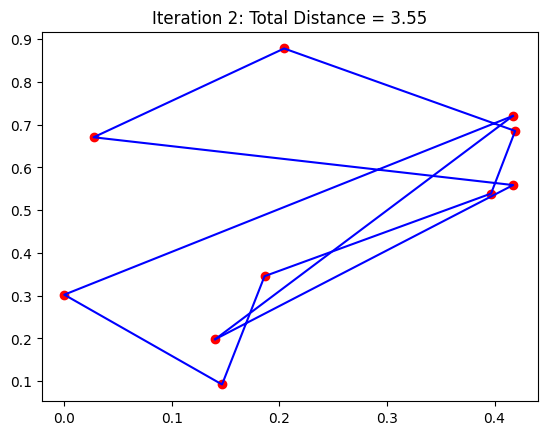

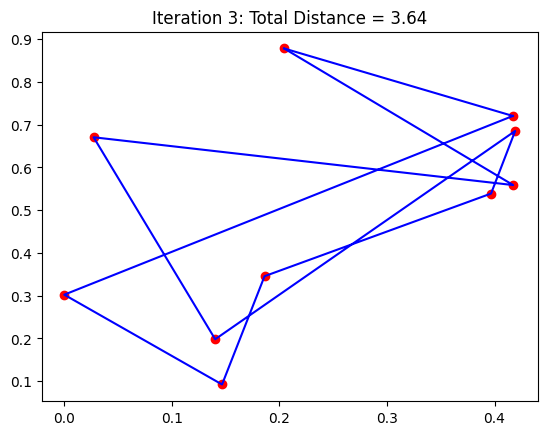

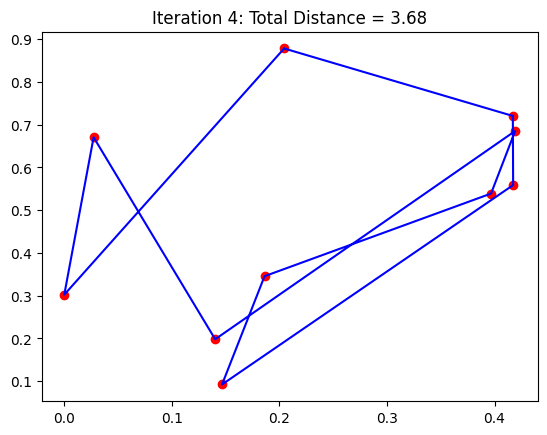

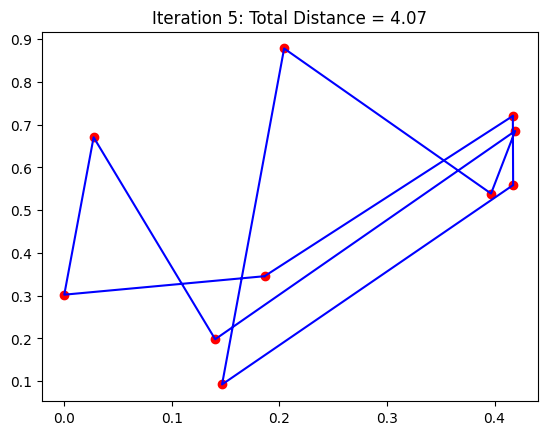

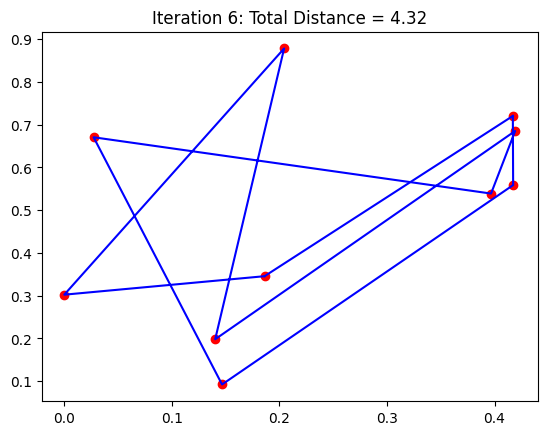

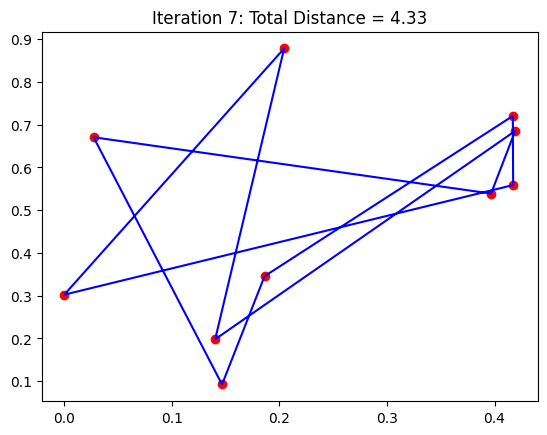

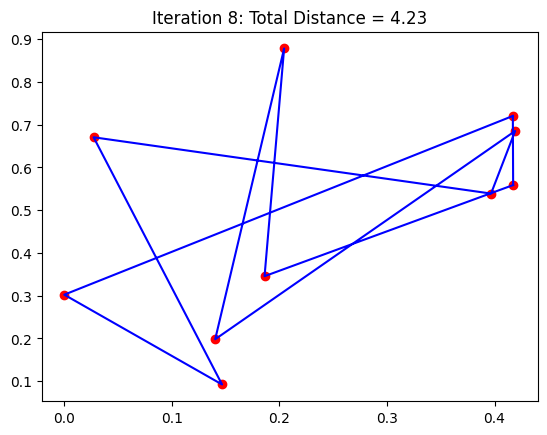

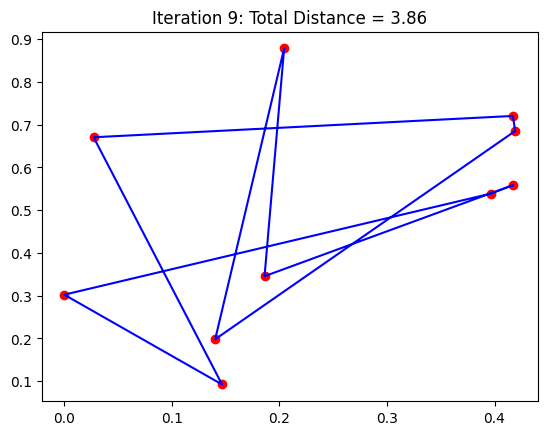

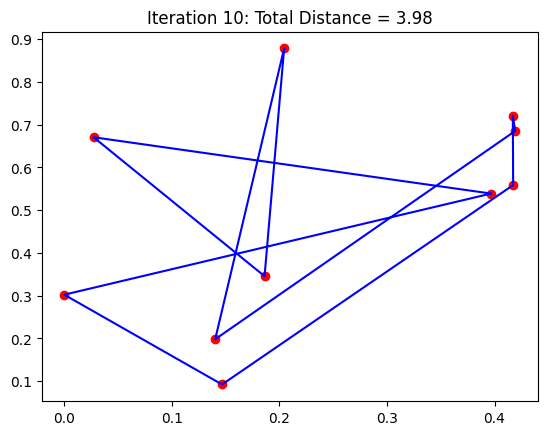

Best distance: 3.5494442132849473


In [3]:
# Example usage
num_cities = 10
np.random.seed(1)
cities = np.random.rand(num_cities, 2)
temp = 100
alpha = 0.9995
stopping_temp = 1e-5
stopping_iter = 10

show_plots=True

best_route, best_distance = simulated_annealing(cities, temp, alpha, stopping_temp, stopping_iter,show_plots)

#print("Best route:", best_route)
print("Best distance:", best_distance)

In [4]:
num_cities = 10
np.random.seed(1)
cities = np.random.rand(num_cities, 2)

a=[1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
for i in range(len(a)):

  temp = a[i]
  alpha = 0.9995
  stopping_temp = 1e-5
  stopping_iter = 1000

  show_plots=False

  start_time = time.time()  # Record the start time
  best_route, best_distance = simulated_annealing(cities, temp, alpha, stopping_temp, stopping_iter,show_plots)
  end_time = time.time()  # Record the end time
  #print("Best route:", best_route)
  print("Best distance:", best_distance,"Time:", end_time )

Best distance: 2.0691735091073826 Time: 1702211061.8958209
Best distance: 2.5393986267230346 Time: 1702211062.0073154
Best distance: 2.3240930221937175 Time: 1702211062.1016054
Best distance: 2.4674206897350155 Time: 1702211062.1973617
Best distance: 2.126622099740487 Time: 1702211062.320444
Best distance: 2.497169566852917 Time: 1702211062.4204862


In [13]:
np.random.seed(1)


a=[10,20,50,100,200,500,1000,2000,5000]
elapsed_time=np.zeros(len(a))

for i in range(len(a)):

  num_cities=a[i]
  cities = np.random.rand(num_cities, 2)

  temp = 1000
  alpha = 0.9995
  stopping_temp = 1e-5
  stopping_iter = 100

  show_plots=False

  start_time = time.time()  # Record the start time
  best_route, best_distance = simulated_annealing(cities, temp, alpha, stopping_temp, stopping_iter,show_plots)
  end_time = time.time()  # Record the end time
  elapsed_time[i] = end_time - start_time  # Calculate the elapsed time

  print("Cities:", a[i], " Time:", elapsed_time[i])


Cities: 10  Time: 0.019557476043701172
Cities: 20  Time: 0.07000303268432617
Cities: 50  Time: 0.03556370735168457
Cities: 100  Time: 0.07560181617736816
Cities: 200  Time: 0.1493213176727295
Cities: 500  Time: 0.35357165336608887
Cities: 1000  Time: 0.7111063003540039
Cities: 2000  Time: 1.4182031154632568
Cities: 5000  Time: 3.473829984664917


In [6]:
print(a,elapsed_time)


[10, 20, 50, 100, 200, 500, 1000, 2000, 5000] [0.01820993 0.02981114 0.05158615 0.07656336 0.23766255 0.8698504
 1.55208731 5.5088141  8.05718899]


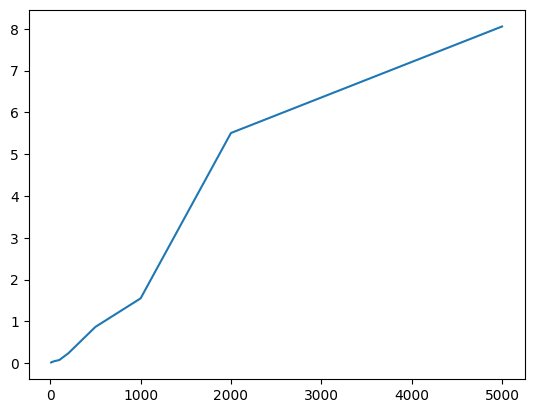

In [7]:
plt.plot(a,elapsed_time)
plt.show()